# Tokenization

In [2]:
# Import the Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer


## Write some sentences

Feel free to change and add sentences as you like

In [3]:
sentences = [
    'My favorite food is ice cream',
    'do you like ice cream too?',
    'My dog likes ice cream!',
    "your favorite flavor of icecream is chocolate",
    "chocolate isn't good for dogs",
    "your dog, your cat, and your parrot prefer broccoli"
]

## Tokenize the words

The first step to preparing text to be used in a machine learning model is to tokenize the text, in other words, to generate numbers for the words.

In [4]:
# Optionally set the max number of words to tokenize.
# The out of vocabulary (OOV) token represents words that are not in the index.
# Call fit_on_text() on the tokenizer to generate unique numbers for each word
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)


## View the word index
After you tokenize the text, the tokenizer has a word index that contains key-value pairs for all the words and their numbers.

The word is the key, and the number is the value.

Notice that the OOV token is the first entry.


In [5]:
# Examine the word index
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'your': 2, 'ice': 3, 'cream': 4, 'my': 5, 'favorite': 6, 'is': 7, 'dog': 8, 'chocolate': 9, 'food': 10, 'do': 11, 'you': 12, 'like': 13, 'too': 14, 'likes': 15, 'flavor': 16, 'of': 17, 'icecream': 18, "isn't": 19, 'good': 20, 'for': 21, 'dogs': 22, 'cat': 23, 'and': 24, 'parrot': 25, 'prefer': 26, 'broccoli': 27}


In [6]:
# Get the number for a given word
print(word_index['favorite'])

6


# Create sequences for the sentences

After you tokenize the words, the word index contains a unique number for each word. However, the numbers in the word index are not ordered. Words in a sentence have an order. So after tokenizing the words, the next step is to generate sequences for the sentences.

In [7]:
sequences = tokenizer.texts_to_sequences(sentences)
print (sequences)

[[5, 6, 10, 7, 3, 4], [11, 12, 13, 3, 4, 14], [5, 8, 15, 3, 4], [2, 6, 16, 17, 18, 7, 9], [9, 19, 20, 21, 22], [2, 8, 2, 23, 24, 2, 25, 26, 27]]


# Sequence sentences that contain words that are not in the word index

Let's take a look at what happens if the sentence being sequenced contains words that are not in the word index.

The Out of Vocabluary (OOV) token is the first entry in the word index. You will see it shows up in the sequences in place of any word that is not in the word index.

In [8]:
sentences2 = ["I like hot chocolate", "My dogs and my hedgehog like kibble but my squirrel prefers grapes and my chickens like ice cream, preferably vanilla"]

sequences2 = tokenizer.texts_to_sequences(sentences2)
print(sequences2)

[[1, 13, 1, 9], [5, 22, 24, 5, 1, 13, 1, 1, 5, 1, 1, 1, 24, 5, 1, 13, 3, 4, 1, 1]]


# Preparing text to use with TensorFlow models


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l09c02_nlp_padding.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l09c02_nlp_padding.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

The high level steps to prepare text to be used in a machine learning model are:

1.   Tokenize the words to get numerical values for them
2.   Create numerical sequences of the sentences
3.   Adjust the sequences to all be the same length.

In this colab, you learn how to use padding to make the sequences all be the same length.

## Import the classes you need

In [9]:
# Import Tokenizer and pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Write some sentences

Feel free to write your own sentences here.


In [10]:
sentences = [
    'My favorite food is ice cream',
    'do you like ice cream too?',
    'My dog likes ice cream!',
    "your favorite flavor of icecream is chocolate",
    "chocolate isn't good for dogs",
    "your dog, your cat, and your parrot prefer broccoli"
]
print(sentences)


['My favorite food is ice cream', 'do you like ice cream too?', 'My dog likes ice cream!', 'your favorite flavor of icecream is chocolate', "chocolate isn't good for dogs", 'your dog, your cat, and your parrot prefer broccoli']


## Create the Tokenizer and define an out of vocabulary token
When creating the Tokenizer, you can specify the max number of words in the dictionary. You can also specify a token to represent words that are out of the vocabulary (OOV), in other words, that are not in the dictionary. This OOV token will be used when you create sequences for sentences that contain words that are not in the word index.

In [11]:
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")

## Tokenize the words

In [12]:
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'your': 2, 'ice': 3, 'cream': 4, 'my': 5, 'favorite': 6, 'is': 7, 'dog': 8, 'chocolate': 9, 'food': 10, 'do': 11, 'you': 12, 'like': 13, 'too': 14, 'likes': 15, 'flavor': 16, 'of': 17, 'icecream': 18, "isn't": 19, 'good': 20, 'for': 21, 'dogs': 22, 'cat': 23, 'and': 24, 'parrot': 25, 'prefer': 26, 'broccoli': 27}


## Turn sentences into sequences 

Each word now has a unique number in the word index.  However, words in a sentence are in a specific order. You can't just randomly mix up words and have the outcome be a sentence.

For example, although "chocolate isn't good for dogs" is a perfectly fine sentence, "dogs isn't for chocolate good" does not make sense as a sentence.

So the next step to representing text in a way that can be meaningfully used by machine learning programs is to create numerical sequences that represent the sentences in the text.

Each sentence will be converted into a sequence where each word is replaced by its number in the word index. 

In [13]:
sequences = tokenizer.texts_to_sequences(sentences)
print (sequences)

[[5, 6, 10, 7, 3, 4], [11, 12, 13, 3, 4, 14], [5, 8, 15, 3, 4], [2, 6, 16, 17, 18, 7, 9], [9, 19, 20, 21, 22], [2, 8, 2, 23, 24, 2, 25, 26, 27]]


## Make the sequences all the same length

Later, when you feed the sequences into a neural network to train a model, the sequences all need to be uniform in size. Currently the sequences have varied lengths, so the next step is to make them all be the same size, either by padding them with zeros and/or truncating them.

Use f.keras.preprocessing.sequence.pad_sequences to add zeros to the sequences to make them all be the same length. By default, the padding goes at the start of the sequences, but you can specify to pad at the end.

You can optionally specify the maximum length to pad the sequences to. Sequences that are longer than the specified max length will be truncated. By default, sequences are truncated from the beginning of the sequence, but you can specify to truncate from the end.

If you don't provide the max length, then the sequences are padded to match the length of the longest sentence.

For all the options when padding and truncating sequences, see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

 

In [14]:
padded = pad_sequences(sequences)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)



Word Index =  {'<OOV>': 1, 'your': 2, 'ice': 3, 'cream': 4, 'my': 5, 'favorite': 6, 'is': 7, 'dog': 8, 'chocolate': 9, 'food': 10, 'do': 11, 'you': 12, 'like': 13, 'too': 14, 'likes': 15, 'flavor': 16, 'of': 17, 'icecream': 18, "isn't": 19, 'good': 20, 'for': 21, 'dogs': 22, 'cat': 23, 'and': 24, 'parrot': 25, 'prefer': 26, 'broccoli': 27}

Sequences =  [[5, 6, 10, 7, 3, 4], [11, 12, 13, 3, 4, 14], [5, 8, 15, 3, 4], [2, 6, 16, 17, 18, 7, 9], [9, 19, 20, 21, 22], [2, 8, 2, 23, 24, 2, 25, 26, 27]]

Padded Sequences:
[[ 0  0  0  5  6 10  7  3  4]
 [ 0  0  0 11 12 13  3  4 14]
 [ 0  0  0  0  5  8 15  3  4]
 [ 0  0  2  6 16 17 18  7  9]
 [ 0  0  0  0  9 19 20 21 22]
 [ 2  8  2 23 24  2 25 26 27]]


In [15]:
# Specify a max length for the padded sequences
padded = pad_sequences(sequences, maxlen=15)
print(padded)

[[ 0  0  0  0  0  0  0  0  0  5  6 10  7  3  4]
 [ 0  0  0  0  0  0  0  0  0 11 12 13  3  4 14]
 [ 0  0  0  0  0  0  0  0  0  0  5  8 15  3  4]
 [ 0  0  0  0  0  0  0  0  2  6 16 17 18  7  9]
 [ 0  0  0  0  0  0  0  0  0  0  9 19 20 21 22]
 [ 0  0  0  0  0  0  2  8  2 23 24  2 25 26 27]]


In [16]:
# Put the padding at the end of the sequences
padded = pad_sequences(sequences, maxlen=15, padding="post")
print(padded)

[[ 5  6 10  7  3  4  0  0  0  0  0  0  0  0  0]
 [11 12 13  3  4 14  0  0  0  0  0  0  0  0  0]
 [ 5  8 15  3  4  0  0  0  0  0  0  0  0  0  0]
 [ 2  6 16 17 18  7  9  0  0  0  0  0  0  0  0]
 [ 9 19 20 21 22  0  0  0  0  0  0  0  0  0  0]
 [ 2  8  2 23 24  2 25 26 27  0  0  0  0  0  0]]


In [17]:
# Limit the length of the sequences, you will see some sequences get truncated
padded = pad_sequences(sequences, maxlen=3)
print(padded)

[[ 7  3  4]
 [ 3  4 14]
 [15  3  4]
 [18  7  9]
 [20 21 22]
 [25 26 27]]


## What happens if some of the sentences contain words that are not in the word index?

Here's where the "out of vocabulary" token is used. Try generating sequences for some sentences that have words that are not in the word index.

In [18]:
# Try turning sentences that contain words that 
# aren't in the word index into sequences.
# Add your own sentences to the test_data
test_data = [
    "my best friend's favorite ice cream flavor is strawberry",
    "my dog's best friend is a manatee"
]
print (test_data)

# Remind ourselves which number corresponds to the
# out of vocabulary token in the word index
print("<OOV> has the number", word_index['<OOV>'], "in the word index.")

# Convert the test sentences to sequences
test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

# Pad the new sequences
padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")

# Notice that "1" appears in the sequence wherever there's a word 
# that's not in the word index
print(padded)

["my best friend's favorite ice cream flavor is strawberry", "my dog's best friend is a manatee"]
<OOV> has the number 1 in the word index.

Test Sequence =  [[5, 1, 1, 6, 3, 4, 16, 7, 1], [5, 1, 1, 1, 7, 1, 1]]

Padded Test Sequence: 
[[ 0  5  1  1  6  3  4 16  7  1]
 [ 0  0  0  5  1  1  1  7  1  1]]


## tokenization w/ big data

In [19]:
# Import Tokenizer and pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import numpy and pandas
import numpy as np
import pandas as pd


# Get the corpus of text

The combined dataset of reviews has been saved in a Google drive belonging to Udacity. You can download it from there.

In [20]:
path = tf.keras.utils.get_file('reviews.csv', 
                               'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
print (path)

127831/127831 [==============================] - 0s 0us/step
/root/.keras/datasets/reviews.csv


# Get the dataset

Each row in the csv file is a separate review.

The csv file has 2 columns:

*   **text** (the review)
*   **sentiment** (0 or 1 indicating a bad or good review)

In [21]:
# Read the csv file
dataset = pd.read_csv(path)

# Review the first few entries in the dataset
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


# Get the reviews from the csv file

In [22]:
# Get the reviews from the text column
reviews = dataset['text'].tolist()

# Tokenize the text
Create the tokenizer, specify the OOV token, tokenize the text, then inspect the word index.

In [24]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)


3261
{'<OOV>': 1, 'the': 2, 'and': 3, 'i': 4, 'a': 5, 'it': 6, 'to': 7, 'is': 8, 'was': 9, 'this': 10, 'of': 11, 'not': 12, 'for': 13, 'my': 14, 'in': 15, 'with': 16, 'very': 17, 'good': 18, 'great': 19, 'phone': 20, 'that': 21, 'on': 22, 'have': 23, 'you': 24, 'food': 25, 'had': 26, 'place': 27, 'so': 28, 'but': 29, 'service': 30, 'are': 31, 'be': 32, 'we': 33, 'all': 34, 'as': 35, 'at': 36, 'like': 37, 'they': 38, 'time': 39, 'back': 40, 'one': 41, 'were': 42, 'quality': 43, 'would': 44, 'really': 45, 'here': 46, 'if': 47, 'from': 48, 'well': 49, 'your': 50, 'just': 51, 'product': 52, 'up': 53, 'best': 54, "don't": 55, 'no': 56, 'will': 57, 'an': 58, 'there': 59, 'go': 60, 'me': 61, 'has': 62, 'only': 63, 'also': 64, 'works': 65, "i've": 66, 'out': 67, 'headset': 68, 'nice': 69, 'ever': 70, 'battery': 71, "it's": 72, 'sound': 73, 'than': 74, 'use': 75, 'or': 76, 'when': 77, "i'm": 78, 'our': 79, 'get': 80, 'what': 81, 'their': 82, 'after': 83, 'love': 84, 'been': 85, 'did': 86, 'exce

# Generate sequences for the reviews
Generate a sequence for each review. Set the max length to match the longest review. Add the padding zeros at the end of the review for reviews that are not as long as the longest one.

In [25]:
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, padding='post')

# What is the shape of the vector containing the padded sequences?
# The shape shows the number of sequences and the length of each one.
print(padded_sequences.shape)

# What is the first review?
print (reviews[0])

# Show the sequence for the first review
print(padded_sequences[0])

# Try printing the review and padded sequence for other elements.

(1992, 139)
So there is no way for me to plug it in here in the US unless I go by a converter.
[  28   59    8   56  142   13   61    7  269    6   15   46   15    2
  149  449    4   60  113    5 1429    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [8]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Get the dataset

We're going to use a dataset containing Amazon and Yelp reviews, with their related sentiment (1 for positive, 0 for negative). This dataset was originally extracted from [here](https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set).

In [7]:
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2023-02-10 04:59:43--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 173.194.218.100, 173.194.218.101, 173.194.218.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nvvjfic227ft7c9c8r0ecm67tolhndif/1676005125000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=963e7a67-b54c-4e75-b687-980e0e5e86ee [following]
--2023-02-10 04:59:44--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nvvjfic227ft7c9c8r0ecm67tolhndif/1676005125000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=963e7a67-b54c-4e75-b687-980e0e5e86ee
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 74.125.134.132, 2607:f8b0:400c:c00::84
Connecting to do

In [9]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/tmp/sentiment.csv')

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Tokenize the dataset

Tokenize the dataset, including padding and OOV

In [10]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

## Review a Sequence

Let's quickly take a look at one of the padded sequences to ensure everything above worked appropriately.

In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.


## Train a Basic Sentiment Model with Embeddings

In [12]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 6)                 9606      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
50/50 [==============================] - 2s 12ms/step - loss: 0.6927 - accuracy: 0.5173 - val_loss: 0.6978 - val_accuracy: 0.4110
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5229 - val_loss: 0.7008 - val_accuracy: 0.4110
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5738 - val_loss: 0.6834 - val_accuracy: 0.5363
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.7514 - val_loss: 0.6346 - val_accuracy: 0.7143
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 0.5421 - accuracy: 0.8186 - val_loss: 0.5715 - val_accuracy: 0.7444
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.8964 - val_loss: 0.5439 - val_accuracy: 0.7218
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.9165 - val_loss: 0.4823 - val_accuracy: 0.7719
Epoch 8/10
50/50 [=

## Get files for visualizing the network

The code below will download two files for visualizing how your network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files, then click the "Sphereize" checkbox.

In [14]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

## Predicting Sentiment in New Reviews

Now that you've trained and visualized your network, take a look below at how we can predict sentiment in new reviews the network has never seen before.

In [15]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 [==============================] - 0s 81ms/step
I love this phone
[0.97937185]


I hate spaghetti
[0.08169074]


Everything was cold
[0.47374475]


Everything was hot exactly as I wanted
[0.6973145]


Everything was green
[0.5684528]


the host seated us immediately
[0.7062718]


they gave us free chocolate cake
[0.8673687]


not sure about the wilted flowers on the table
[0.04739018]


only works when I stand on tippy toes
[0.9337003]


does not work when I stand on my head
[0.00238234]




# What's in a (sub)word?

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l09c06_nlp_subwords.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l09c06_nlp_subwords.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this colab, we'll work with subwords, or words made up of the pieces of larger words, and see how that impacts our network and related embeddings.

## Import TensorFlow and related functions

In [16]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences

## Get the original dataset

We'll once again use the dataset containing Amazon and Yelp reviews. This dataset was originally extracted from [here](https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set).

In [17]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P \
    -O /tmp/sentiment.csv

--2023-02-10 06:48:24--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 173.194.217.102, 173.194.217.138, 173.194.217.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/obm4tifg0at841cslb1v9jb5dpcsq48k/1676011650000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=25820f49-ee2d-41d8-b193-e5a09189baa6 [following]
--2023-02-10 06:48:25--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/obm4tifg0at841cslb1v9jb5dpcsq48k/1676011650000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=25820f49-ee2d-41d8-b193-e5a09189baa6
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 108.177.13.132, 2607:f8b0:400c:c09::84
Connecting to do

In [18]:
import pandas as pd

dataset = pd.read_csv('/tmp/sentiment.csv')

# Just extract out sentences and labels first - we will create subwords here
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

## Create a subwords dataset

We can use the existing Amazon and Yelp reviews dataset with `tensorflow_datasets`'s `SubwordTextEncoder` functionality. `SubwordTextEncoder.build_from_corpus()` will create a tokenizer for us. You could also use this functionality to get subwords from a much larger corpus of text as well, but we'll just use our existing dataset here.

The Amazon and Yelp dataset we are using isn't super large, so we'll create a subword `vocab_size` of only the 1,000 most common words, as well as cutting off each subword to be at most 5 characters.

Check out the related documentation [here](https://www.tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder#build_from_corpus).

In [20]:
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

In [21]:
# Check that the tokenizer works appropriately
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)
# Separately print out each subword, decoded
for i in encoded:
  print(tokenizer.decode([i]))

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]
I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


## Replace sentence data with encoded subwords

Now, we'll re-create the dataset to be used for training by actually encoding each of the individual sentences. This is equivalent to `text_to_sequences` with the `Tokenizer` we used in earlier exercises.

In [22]:
for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

In [23]:
# Check the sentences are appropriately replaced
print(sentences[1])

[625, 677, 626, 274, 380, 633, 148, 844, 789]


## Final pre-processing

Before training, we still need to pad the sequences, as well as split into training and test sets.

In [24]:
import numpy as np

max_length = 50
trunc_type='post'
padding_type='post'

# Pad all sentences
sentences_padded = pad_sequences(sentences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences_padded[0:training_size]
testing_sentences = sentences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Train a Sentiment Model

In [25]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [26]:
num_epochs = 30
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_sentences, training_labels_final, epochs=num_epochs, 
                    validation_data=(testing_sentences, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 1s 8ms/step - loss: 0.6941 - accuracy: 0.4809 - val_loss: 0.6948 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5248 - val_loss: 0.6940 - val_accuracy: 0.4110
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.6121 - val_loss: 0.6897 - val_accuracy: 0.6441
Epoch 4/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.7250 - val_loss: 0.6817 - val_accuracy: 0.7243
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.7633 - val_loss: 0.6693 - val_accuracy: 0.7318
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.7389 - val_loss: 0.6509 - val_accuracy: 0.7318
Epoch 7/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6348 - accuracy: 0.7696 - val_loss: 0.6312 - val_accuracy: 0.7293
Epoch 8/30
50/50 [==

## Visualize the Training Graph

We can visualize the training graph below again. Does there appear to be a difference in how validation accuracy and loss is trending compared to with full words?

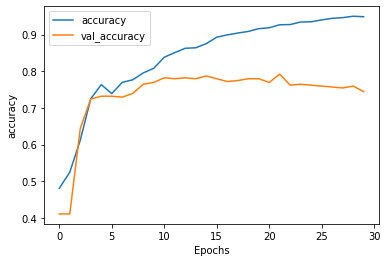

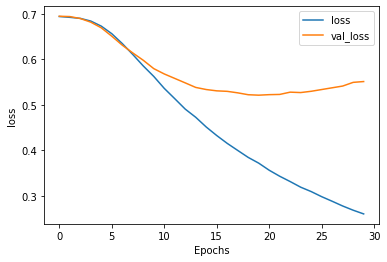

In [27]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Get files for visualizing the network

Once again, you can visualize the sentiment related to all of the subwords using the below code and by heading to http://projector.tensorflow.org/ to upload and view the data.

Note that the below code does have a few small changes to handle the different way text is encoded in our dataset compared to before with the built in `Tokenizer`.

You may get an error like "Number of tensors (999) do not match the number of lines in metadata (992)." As long as you load the vectors first without error and wait a few seconds after this pops up, you will be able to click outside the file load menu and still view the visualization.

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(0, vocab_size - 1):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')